#### 산업수학 2주차 과제 (202021186 명서준)

# Graph Laplacians and Eigenvalue

<br>
<br>

* ***선형대수 활용 예시 : 네트워크 분석*** <br>
그래프 이론에서 **고윳값(eigen value)**은 네트워크의 중요한 특성을 나타내는 데 사용됩니다. 그중 라플라시안(Laplacian) 행렬의 고윳값은 그래프의 커뮤니티 구조를 파악하는 데 도움이 됩니다.

<br>

목차
1. Graph Laplacians
2. Find Connected Component 
3. Graph Clustering
4. Find Central Node
5. Zachary's Karate Club 


***

### 1. Graph Laplacians
<br>
그래프를 행렬로 표현하는 방법에는 여러가지가 있습니다.<br>
대표적인 예로 adjacency matrix, incidence matrix, degree matrix 등이 있으며,<br>
그래프의 Laplacian 행렬은 다음과 같이 정의됩니다.<br>

Let G is graph, D is degree matrix of G , A is adjacency matrix of G and L is laplacian of G.<br> 
Then **L = D - A**<br>

![def_laplace_mat](def_laplace_mat.png)
<br>

<br>
이제 한 그래프 예시를 들어보고, 그 그래프의 라플라시안 행렬을 구해보도록 하겠습니다.

In [68]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# 초기설정1 - 실행 후 커널 재시작
# networkx라이브러리가 그래프를 시각화하는데 오류를 없애줍니다.
!pip install decorator==4.3      

In [4]:
# 초기설정2 - 실행 후 커널 재시작
# scipy 최신버전 업그레이드 - 라플라시안 행렬 계산에 도움을 줍니다.
!pip install --upgrade scipy

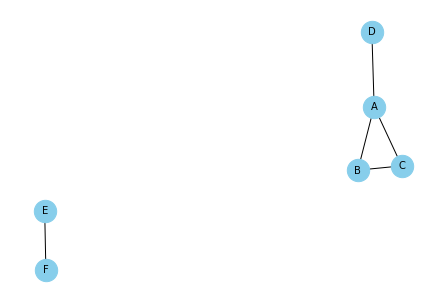

In [14]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Graph 할당 (adjency graph)
A = np.array([
    [0, 1, 1, 1, 0, 0],
    [1, 0, 1, 0, 0, 0],
    [1, 1, 0, 0, 0, 0],
    [1, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 1],
    [0, 0, 0, 0, 1, 0],
])

labels={0: "A", 1: "B", 2: "C", 3: "D", 4:"E", 5: "F"}

G = nx.Graph(A)

# 그래프 시각화
pos = nx.spring_layout(G)  
nx.draw(G, pos, labels=labels, with_labels=True, node_size=500, node_color='skyblue', font_size=10)
plt.show()

In [2]:
# Degree Matrix 
n = A.shape[0]

D = np.zeros((n, n))
for label, degree in G.degree:
    D[label, label] = degree

print(D)

[[3. 0. 0. 0. 0. 0.]
 [0. 2. 0. 0. 0. 0.]
 [0. 0. 2. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]]


In [3]:
# Laplacian Matrix
L = D - A
print(L)

[[ 3. -1. -1. -1.  0.  0.]
 [-1.  2. -1.  0.  0.  0.]
 [-1. -1.  2.  0.  0.  0.]
 [-1.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  1. -1.]
 [ 0.  0.  0.  0. -1.  1.]]


***

### 2. Find Connected Component

<br>
* A connected component of G is a maximal conncted subgraph <br>

#### Theorem) Laplacian 행렬의 고윳값 0의 개수는 Graph의 Connected Component의 개수와 같다. <br>
(증명은 대학원 과목 박보람 교수님의 그래프 이론 수업을 들으시면 되겠습니다^^)

In [11]:
# numpy를 이용해 고유값과 고유벡터를 계산
eig_value, eig_vector = np.linalg.eig(L)

# float64를 보기 편하게 3자리 소수점으로 반올림
eig_value = eig_value.round(3)
eig_vector = eig_vector.round(3)

# 고윳값을 기준으로 오름차순으로 정렬 (* argsort는 원래 값이 아닌 index를 정렬!)
sortidx = np.argsort(eig_value)

eig_value = eig_value[sortidx]
eig_vector = eig_vector[:, sortidx]

In [12]:
# 위의 이미지에서 그래프의 conncetec component가 2개인 것을 확인 할 수 있었고,
# 정렬된 고유값을 출력하면 고윳값 0이 2개인 것을 확인할 수 있습니다. 

print(eig_value)

[0. 0. 1. 2. 3. 4.]


In [13]:
# 정렬된 고윳값에 해당하는 고유벡터를 출력해보면
# 첫번째 열은 0~3번 행인 Node(A,B,C,D)에 대해 값을 가져 4개의 Node가 하나의 connected component 임을 알 수 있습니다.
# 두번째 열은 4~5번 행인 Node(E,F)에 대해 값을 가져 2개의 Node가 하나의 connected component임을 알 수 있습니다.

print(eig_vector)

[[-0.5    0.    -0.     0.     0.     0.866]
 [-0.5    0.    -0.408  0.    -0.707 -0.289]
 [-0.5    0.    -0.408  0.     0.707 -0.289]
 [-0.5    0.     0.816  0.    -0.    -0.289]
 [ 0.     0.707  0.     0.707  0.     0.   ]
 [ 0.     0.707  0.    -0.707  0.     0.   ]]


***

### 3. Graph Clustering

<br>
라플라시안 행렬의 고윳값들은 항상 0 이상의 값을 갖게 되고 각각의 값들은 그 그래프의 어떤 특성을 반영하고 있습니다.<br>

앞에서 본 예시로 고윳값이 0의 개수는 그 그래프의 connected component 수를 나타내고 이에 해당하는 고유벡터는 모든 노드에 대해서 동일한 값을 갖습니다.<br>

가장 큰 고윳값은 그래프의 크기와 관련이 있다고 하며, 
**<두 번째로 작은 고윳값>**은 그래프의 구조에 대한 정보를 담고 있어 그래프의 cluster를 나누는 데 사용된다고 합니다. <br>
(두 번째로 작은 고윳값의 고유벡터의 원소는 0을 기준으로 0 이상인 node와 0보다 작은 node로 나뉩니다.) 

이번 장에서는 **두 번째로 작은 고윳값**을 이용하여 Fully Connected Graph를 단순히 두개의 cluster로 나누는 예제를 보여드리려고 합니다.<br>

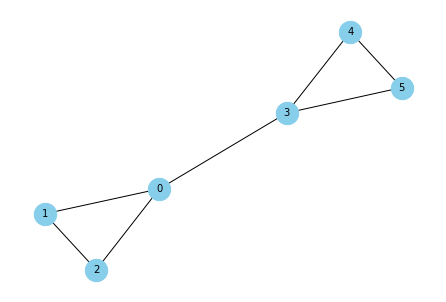

In [22]:
# 이미 나뉘어져 있는 grpah에서 최적의 cluster를 찾는 것은 별 의미가 없으니
# 새로운 fully connected graph 예시를 들어봅시다.

# 새로운 fully connected graph의 adgency graph 할당
A = np.array([
    [0, 1, 1, 1, 0, 0],
    [1, 0, 1, 0, 0, 0],
    [1, 1, 0, 0, 0, 0],
    [1, 0, 0, 0, 1, 1],
    [0, 0, 0, 1, 0, 1],
    [0, 0, 0, 1, 1, 0],
])

G = nx.Graph(A)

# 시각화
pos = nx.spring_layout(G)  
nx.draw(G, pos, with_labels=True, node_size=500, node_color='skyblue', font_size=10)
plt.show()

In [23]:
# 그래프의 Laplacian 행렬 생성

n = A.shape[0]

D = np.zeros((n, n))
for label, degree in G.degree:
    D[label, label] = degree
    
L = D - A
print(L)

[[ 3. -1. -1. -1.  0.  0.]
 [-1.  2. -1.  0.  0.  0.]
 [-1. -1.  2.  0.  0.  0.]
 [-1.  0.  0.  3. -1. -1.]
 [ 0.  0.  0. -1.  2. -1.]
 [ 0.  0.  0. -1. -1.  2.]]


In [24]:
# 라플라시안 행렬의 고윳값 계산 

eig_value, eig_vector = np.linalg.eig(L)

eig_value = eig_value.round(3)
eig_vector = eig_vector.round(3)

sortidx = np.argsort(eig_value)

eig_value = eig_value[sortidx]
eig_vector = eig_vector[:, sortidx]

print(eig_value)

[0.    0.438 3.    3.    3.    4.562]


In [25]:
# 두 번째로 작은 고윳값의 고유벡터 출력

second_smallest_eig_vector = eig_vector[:, 1]
print(second_smallest_eig_vector)

[ 0.261  0.465  0.465 -0.261 -0.465 -0.465]


In [31]:
# second_smallest_eig_vector의 0 이상인 node와 0 미만인 node로 구분
# np.where : 조건에 만족하는 인덱스 반환

cluster_1 = np.where(second_smallest_eig_vector >= 0)[0]
cluster_2 = np.where(second_smallest_eig_vector < 0)[0]

print(f'cluster1 : {cluster_1}')
print(f'cluster2 : {cluster_2}')

cluster1 : (array([0, 1, 2], dtype=int64),)
cluster2 : (array([3, 4, 5], dtype=int64),)


***

### 4. Find Central Node

<br>
이번 장에서는 그래프의 인접행렬(Adjency Matrix)의 고유벡터(Eigen Vector)를 이용하여 그래프의 중심 노드(Central Node)를 분석해 보려고 합니다.<br>

* idea <br>
그래프의 인접행렬(Adjency Matrix)은 노드 간의 연결 관계를 나타내며, 이 행렬의 고유벡터는 이 연결 관계를 기반으로 특정한 방향이나 패턴을 나타낼 것이고 고윳값은 해당 고유벡터가 나타내는 패턴의 중요도를 나타낼 것이다.<br>
=> 고윳값이 큰 고유벡터는 그래프 전체에서 중요하게 작용하는 패턴을 의미할 것이다.


인접 행렬
[[0 1 1 0 0]
 [1 0 1 1 0]
 [1 1 0 1 0]
 [0 1 1 0 1]
 [0 0 0 1 0]]


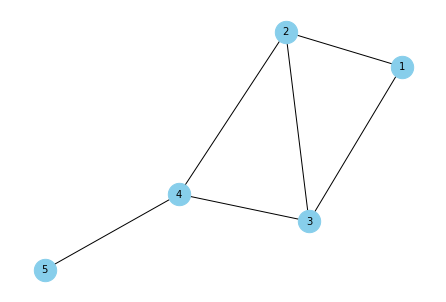

In [91]:
# 그래프 도화지 생성
G = nx.Graph()

# 노드 추가
G.add_nodes_from([1, 2, 3, 4, 5])

# 엣지(간선) 추가
G.add_edges_from([(1, 2), (1, 3), (2, 3), (2, 4), (3, 4), (4, 5)])

# 인접 행렬 생성
adjacency_matrix = nx.adjacency_matrix(G).toarray()

# 인접 행렬 출력
print("인접 행렬")
print(adjacency_matrix)

# 시각화
pos = nx.spring_layout(G)  
nx.draw(G, pos, with_labels=True, node_size=500, node_color='skyblue', font_size=10)
plt.show()

가장 큰 고유값 (λ_max): 2.641186476193292
가장 큰 고유값에 해당하는 고유벡터: [-0.40669371 -0.53707696 -0.53707696 -0.47474974 -0.17974866]
중심성 결과: [0.40669371 0.53707696 0.53707696 0.47474974 0.17974866]


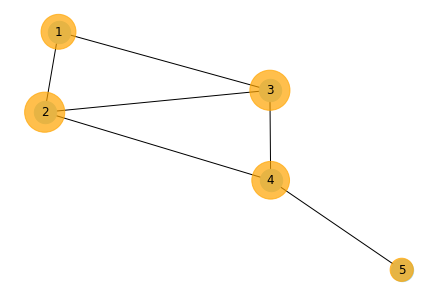

In [95]:
# 고유값과 고유벡터 계산
eigenvalues, eigenvectors = np.linalg.eig(adjacency_matrix)

# 가장 큰 고유값과 해당 고유벡터 선택
max_eigenvalue_index = np.argmax(eigenvalues)
max_eigenvalue = eigenvalues[max_eigenvalue_index]
max_eigenvector = eigenvectors[:, max_eigenvalue_index]

# 중심성 계산 (고유벡터의 크기)
centrality = np.abs(max_eigenvector)

# 결과 출력
print("가장 큰 고유값 (λ_max):", max_eigenvalue)
print("가장 큰 고유값에 해당하는 고유벡터:", max_eigenvector)
print("중심성 결과:", centrality)

# 그래프 시각화
pos = nx.spring_layout(G)  # 그래프의 레이아웃 설정
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=12)

# 중심성에 따라 노드 크기 조절
node_sizes = [c * 3000 for c in centrality]
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color='orange', alpha=0.7)

# 시각화
plt.show()

***

### 5. Zachary's Karate Club Network 적용

<br>
앞에서 해보았던 Center Node 분석과 Clustering을 Zachary's Karate Club Network에 적용시켜봅시다!<br> 
(* karate_club_graph : 1970년대에 Zachary Wayne의 박사 논문에서 사용된 실제 클럽 네트워크 데이터)

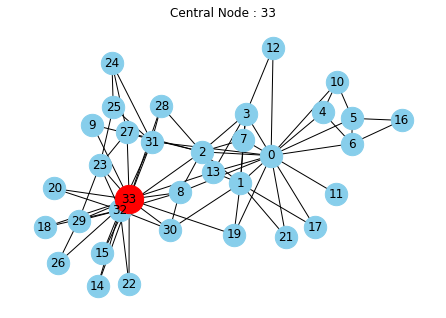

In [99]:
# Zachary's Karate Club 그래프 생성
G = nx.karate_club_graph()

# 중심성 분석
centrality = nx.eigenvector_centrality(G)

# 중심성이 가장 높은 노드 찾기
max_centrality_node = max(centrality, key=centrality.get)

# 중심성 노드 시각화
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=500, node_color='skyblue')
nx.draw_networkx_nodes(G, pos, nodelist=[max_centrality_node], node_color='red', node_size=800)
plt.title(f"Central Node : {max_centrality_node}")
plt.show()

In [101]:
# Zachary's Karate Club 그래프 생성
G = nx.karate_club_graph()

# 라플라시안 행렬 생성
L = nx.laplacian_matrix(G).toarray()

# 라플라시안 행렬의 고윳값 계산 
eig_value, eig_vector = np.linalg.eig(L)

sortidx = np.argsort(eig_value)

eig_value = eig_value[sortidx]
eig_vector = eig_vector[:, sortidx]

# 두 번째로 작은 고유벡터
second_smallest_eig_vector = eig_vector[:, 1]

# 클러스터링
cluster_1 = np.where(second_smallest_eig_vector >= 0)[0]
cluster_2 = np.where(second_smallest_eig_vector < 0)[0]

print(f'cluster1 : {cluster_1}')
print(f'cluster2 : {cluster_2}')

cluster1 : [ 8  9 14 15 18 20 22 23 24 25 26 27 28 29 30 31 32 33]
cluster2 : [ 0  1  2  3  4  5  6  7 10 11 12 13 16 17 19 21]


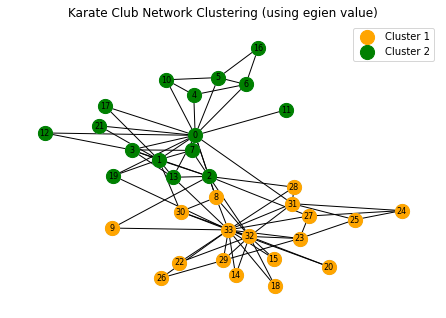

In [104]:
# 그래프 시각화
pos = nx.spring_layout(G)  # 그래프의 레이아웃 설정
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=200, font_size=8)

# 클러스터링 결과 시각화
nx.draw_networkx_nodes(G, pos, nodelist=cluster_1, node_color='orange', node_size=200, label='Cluster 1')
nx.draw_networkx_nodes(G, pos, nodelist=cluster_2, node_color='green', node_size=200, label='Cluster 2')

# 시각화 출력
plt.title("Karate Club Network Clustering (using egien value)")
plt.legend()
plt.show()